In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("churn_clean.csv")
columns = ["Age", "Income","MonthlyCharge", "Tenure", "Outage_sec_perweek", "Email","Bandwidth_GB_Year", "Yearly_equip_failure","Gender","Contract",
           "Marital", "Area", "InternetService","PaperlessBilling", "Churn"]

In [43]:
data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [23]:
updated_data = data[columns]

In [24]:
updated_data.duplicated().sum()

0

In [25]:
updated_data.isna().sum()

Age                        0
Income                     0
MonthlyCharge              0
Tenure                     0
Outage_sec_perweek         0
Email                      0
Bandwidth_GB_Year          0
Yearly_equip_failure       0
Gender                     0
Contract                   0
Marital                    0
Area                       0
InternetService         2129
PaperlessBilling           0
Churn                      0
dtype: int64

In [26]:
updated_data = updated_data.dropna()
updated_data.isna().sum()

Age                     0
Income                  0
MonthlyCharge           0
Tenure                  0
Outage_sec_perweek      0
Email                   0
Bandwidth_GB_Year       0
Yearly_equip_failure    0
Gender                  0
Contract                0
Marital                 0
Area                    0
InternetService         0
PaperlessBilling        0
Churn                   0
dtype: int64

In [27]:
updated_data.describe()

,Age,Income,MonthlyCharge,Tenure,Outage_sec_perweek,Email,Bandwidth_GB_Year,Yearly_equip_failure
count,7871.000000,7871.000000,7871.000000,7871.000000,7871.000000,7871.000000,7871.000000,7871.000000
mean,53.037861,39825.423228,177.937428,34.665050,9.989781,12.017914,3443.172497,0.398552
std,20.607405,28223.978149,42.039387,26.456562,2.980892,3.024014,2188.092280,0.635536
min,18.000000,348.670000,92.455140,1.000259,0.099747,1.000000,169.399280,0.000000
25%,35.000000,19286.155000,147.460100,7.992348,8.033636,10.000000,1285.826834,0.000000
50%,53.000000,33055.590000,172.457857,36.880480,9.986224,12.000000,3376.351709,0.000000
75%,71.000000,53095.315000,204.979700,61.594290,11.952450,14.000000,5640.761859,1.000000
max,89.000000,258900.700000,290.160419,71.994180,21.207230,23.000000,7158.981530,6.000000


In [28]:
updated_data[["Churn", "PaperlessBilling"]] = updated_data[["Churn", "PaperlessBilling"]].replace(["Yes","No"],[1,0])
updated_data

,Age,Income,MonthlyCharge,Tenure,Outage_sec_perweek,Email,Bandwidth_GB_Year,Yearly_equip_failure,Gender,Contract,Marital,Area,InternetService,PaperlessBilling,Churn
0,68,28561.99,172.455519,6.795513,7.978323,10,904.536110,1,Male,One year,Widowed,Urban,Fiber Optic,1,0
1,27,21704.77,242.632554,1.156681,11.699080,12,800.982766,1,Female,Month-to-month,Married,Urban,Fiber Optic,1,1
2,50,9609.57,159.947583,15.754144,10.752800,9,2054.706961,1,Female,Two Year,Widowed,Urban,DSL,1,0
3,48,18925.23,119.956840,17.087227,14.913540,15,2164.579412,0,Male,Two Year,Married,Suburban,DSL,1,0
4,83,40074.19,149.948316,1.670972,8.147417,16,271.493436,1,Male,Month-to-month,Separated,Suburban,Fiber Optic,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23,55723.74,159.979400,68.197130,9.415935,12,6511.252601,0,Male,Month-to-month,Married,Rural,DSL,0,0
9996,48,34129.34,207.481100,61.040370,6.740547,15,5695.951810,0,Male,Two Year,Divorced,Rural,Fiber Optic,0,0
9997,48,45983.43,169.974100,47.416890,6.590911,10,4159.305799,0,Female,Month-to-month,Never Married,Rural,Fiber Optic,1,0
9998,39,16667.58,252.624000,71.095600,12.071910,14,6468.456752,0,Male,Two Year,Separated,Urban,Fiber Optic,1,0


In [29]:
dummy = ["Gender","Contract", "Marital", "Area", "InternetService"]
updated_data = pd.get_dummies(updated_data, columns= dummy, dtype=int, drop_first= True)
updated_data

,Age,Income,MonthlyCharge,Tenure,Outage_sec_perweek,Email,Bandwidth_GB_Year,Yearly_equip_failure,PaperlessBilling,Churn,...,Gender_Nonbinary,Contract_One year,Contract_Two Year,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Area_Suburban,Area_Urban,InternetService_Fiber Optic
0,68,28561.99,172.455519,6.795513,7.978323,10,904.536110,1,1,0,...,0,1,0,0,0,0,1,0,1,1
1,27,21704.77,242.632554,1.156681,11.699080,12,800.982766,1,1,1,...,0,0,0,1,0,0,0,0,1,1
2,50,9609.57,159.947583,15.754144,10.752800,9,2054.706961,1,1,0,...,0,0,1,0,0,0,1,0,1,0
3,48,18925.23,119.956840,17.087227,14.913540,15,2164.579412,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,83,40074.19,149.948316,1.670972,8.147417,16,271.493436,1,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23,55723.74,159.979400,68.197130,9.415935,12,6511.252601,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9996,48,34129.34,207.481100,61.040370,6.740547,15,5695.951810,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9997,48,45983.43,169.974100,47.416890,6.590911,10,4159.305799,0,1,0,...,0,0,0,0,1,0,0,0,0,1
9998,39,16667.58,252.624000,71.095600,12.071910,14,6468.456752,0,1,0,...,0,0,1,0,0,1,0,0,1,1


In [30]:
updated_data.to_csv("Logistic_Regression_Dataset.csv")

In [31]:
X = pd.DataFrame(updated_data)
y = updated_data["Churn"]
X = sm.add_constant(X.drop(columns="Churn"))

In [32]:
model1 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.237959
         Iterations 8


In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7871
Model:                          Logit   Df Residuals:                     7850
Method:                           MLE   Df Model:                           20
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                  0.5945
Time:                        10:40:31   Log-Likelihood:                -1873.0
converged:                       True   LL-Null:                       -4619.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -6.6480      0.385    -17.276      0.000      -7.402      -5.894
Age                             0.0043      0.003      1.666      0.096      -0.001       0.009
Income                       1.423e-06   1.46e-06      0.976      0.329   -1.43e-06    4.28e-06
MonthlyCharge                   0.0507      0.002     21.026      0.000       0.046       0.055
Tenure                         -0.1997      0.038     -5.317      0.000      -0.273      -0.126
Outage_sec_perweek             -0.0061      0.014     -0.435      0.663      -0.033       0.021
Email                          -0.0130      0.014     -0.949      0.343      -0.040       0.014
Bandwidth_GB_Year               0.0011      0.000      2.490      0.013       0.000       0.002
Yearly_equip_failure           -0.0152      0.065     -0.234      0.815      -0.142       0.112
PaperlessBilling                0.1803      0.085      2.133      0.033       0.015       0.346
Gender_Male                     0.2066      0.089      2.311      0.021       0.031       0.382
Gender_Nonbinary               -0.1826      0.284     -0.644      0.520      -0.739       0.373
Contract_One year              -3.1033      0.132    -23.451      0.000      -3.363      -2.844
Contract_Two Year              -3.2582      0.131    -24.828      0.000      -3.515      -3.001
Marital_Married                -0.0269      0.131     -0.205      0.837      -0.283       0.230
Marital_Never Married          -0.0425      0.130     -0.328      0.743      -0.297       0.212
Marital_Separated               0.1049      0.129      0.811      0.417      -0.149       0.358
Marital_Widowed                 0.2121      0.131      1.621      0.105      -0.044       0.469
Area_Suburban                  -0.0215      0.102     -0.210      0.834      -0.222       0.179
Area_Urban                     -0.0110      0.101     -0.108      0.914      -0.210       0.188
InternetService_Fiber Optic    -1.7888      0.244     -7.342      0.000      -2.266      -1.311
===============================================================================================
"""

In [35]:
def backward_elimination_logit(X, y):
    while True:
        reduced_model = sm.Logit(y, X).fit()
        p_values = reduced_model.pvalues
        max_p_value = p_values.max()
        excluded_feature = p_values.idxmax()
        
        if max_p_value > 0.05 and excluded_feature in X.columns:
            X = X.drop(columns=[excluded_feature])
            print(f"Removed {excluded_feature} with p-value {max_p_value}")
        else:
            break
    return X

In [36]:
new_X = backward_elimination_logit(X, y)

Optimization terminated successfully.
         Current function value: 0.237959
         Iterations 8
Removed Area_Urban with p-value 0.9139908609714824
Optimization terminated successfully.
         Current function value: 0.237960
         Iterations 8
Removed Area_Suburban with p-value 0.8572097697458152
Optimization terminated successfully.
         Current function value: 0.237962
         Iterations 8
Removed Marital_Married with p-value 0.8377309423135489
Optimization terminated successfully.
         Current function value: 0.237965
         Iterations 8
Removed Yearly_equip_failure with p-value 0.8160930772637524
Optimization terminated successfully.
         Current function value: 0.237968
         Iterations 8
Removed Marital_Never Married with p-value 0.7892300620829157
Optimization terminated successfully.
         Current function value: 0.237973
         Iterations 8
Removed Outage_sec_perweek with p-value 0.668113215958519
Optimization terminated successfully.
        

In [37]:
model2 = sm.Logit(y, new_X).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.238879
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7871
Model:                          Logit   Df Residuals:                     7863
Method:                           MLE   Df Model:                            7
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                  0.5930
Time:                        10:41:28   Log-Likelihood:                -1880.2
converged:                       True   LL-Null:                       -4619.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -6.4017      0.235    -27.291      0.000      -6.861      -5.942
MonthlyCharge                   0.0551      0.002     34.602      0.000       0.052       0.058
Tenure                         -0.1066      0.003    -35.872      0.000      -0.112      -0.101
PaperlessBilling                0.1923      0.084      2.284      0.022       0.027       0.357
Gender_Male                     0.2816      0.083      3.395      0.001       0.119       0.444
Contract_One year              -3.0857      0.132    -23.425      0.000      -3.344      -2.828
Contract_Two Year              -3.2301      0.130    -24.833      0.000      -3.485      -2.975
InternetService_Fiber Optic    -2.3417      0.101    -23.243      0.000      -2.539      -2.144
===============================================================================================
"""

In [38]:
y_pred1 = round(model1.predict(X)).astype(int)
y_pred2 = round(model2.predict(new_X)).astype(int)


In [39]:
#Accuracy
accuracy1 = accuracy_score(y, y_pred1)
accuracy2 = accuracy_score(y, y_pred2)

#Precision
precision1 = precision_score(y, y_pred1)
precision2 = precision_score(y, y_pred2)

#Recall
recall1 = recall_score(y, y_pred1)
recall2 = recall_score(y, y_pred2)

#F1-Score
f1 = f1_score(y, y_pred1)
f2 = f1_score(y, y_pred2)


In [40]:
print(f"Accuracy of Model1 is {accuracy1:.2f} and Model2 is {accuracy2:.2f}")
print(f"Precision of Model1 is {precision1:.2f} and Model2 is {precision2:.2f}")
print(f"Recall of Model1 is {recall1:.2f} and Model2 is {recall2:.2f} ")
print(f"Accuracy of Model1 is {f1:.2f} and Model2 is {f2:.2f}")

Accuracy of Model1 is 0.90 and Model2 is 0.89
Precision of Model1 is 0.82 and Model2 is 0.82
Recall of Model1 is 0.79 and Model2 is 0.79 
Accuracy of Model1 is 0.80 and Model2 is 0.80


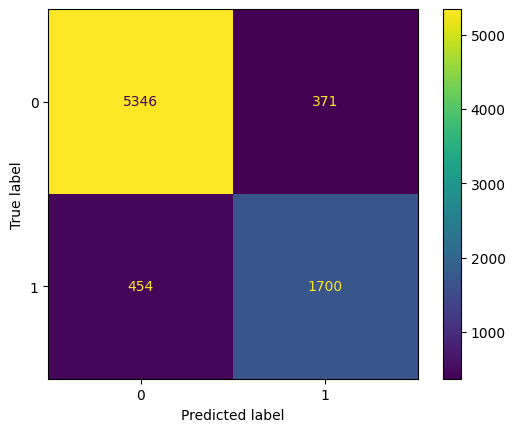

In [41]:
cm1 = confusion_matrix(y, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0,1])
disp.plot()
plt.show()

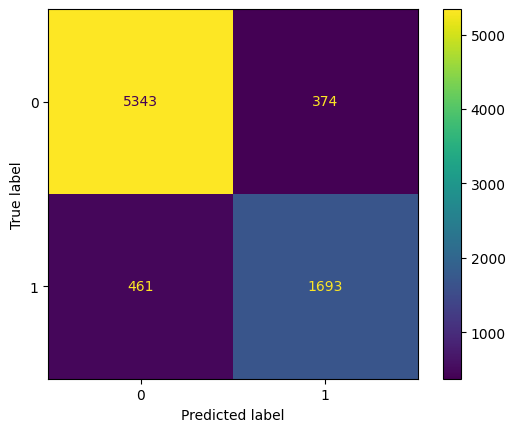

In [42]:
cm2 = confusion_matrix(y, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0,1])
disp.plot()
plt.show()